### Fibonacci Retracement

<font color='orange'>
    Fibonacci retracement levels—stemming from the Fibonacci sequence—are horizontal lines that indicate where support and resistance are likely to occur.
    <br> 
    Each level is associated with a percentage. The percentage is how much of a prior move the price has retraced. The Fibonacci retracement levels are 23.6%, 38.2%, 61.8%, and 78.6%. While not officially a Fibonacci ratio, 50% is also used.
    <br>
    Fibonacci retracement works best when there is a strong overall trend in the market, and it is normally to place entry orders, determine stop-loss levels, or set price targets. The intuition behind this indicator is that:
    <ul>
    <li>Uptrend:</li>
        After having reached a Higher High in an uptrend, the price temporarily returns (retraces) part way back to the previous price level before the uptrend continues -> support at retracement level
    <li>Downtrend:</li>
        After having reached a Lower Low in an downtrend, the price temporarily returns (retraces) part way back to the previous price level before the downtrend continues -> resistance at retracement level
    </ul>
</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema 
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv('./data/EURUSD_ohlc.csv', parse_dates = [0], index_col = 0)
data.head()

,Open,High,Low,Close
2008-01-01,1.45905,1.47502,1.45885,1.47146
2008-01-02,1.47146,1.47812,1.46876,1.47510
2008-01-03,1.47504,1.48254,1.46958,1.47429
2008-01-05,1.47451,1.47559,1.47430,1.47465
2008-01-06,1.47465,1.47560,1.46586,1.46954


#### Identify High and Lows

In [3]:
# Approximately last 3 months for daily data
order = 70

> **Highs**

In [4]:
data['hh'] = np.nan
data['hh_date'] = np.nan

In [5]:
for bar in range(len(data)):
    # Determine the current bar´s date
    date = data.index[bar]
    # Get the high column until current bar
    hh = data.iloc[:bar+1].High
    
    # Determine all local highs until current bar
    local_max = argrelextrema(hh.values, np.greater_equal, order = order) 
    
    # Determine the most recent local high (price) and add to 'hh' column
    data.loc[date, 'hh'] = data.High.values[local_max][-1]
    
    # Determine the most recent local high (date) and add to 'hh_date' column
    data.loc[date, 'hh_date'] = data.index[local_max][-1]

In [6]:
data.head()

,Open,High,Low,Close,hh,hh_date
2008-01-01,1.45905,1.47502,1.45885,1.47146,1.47502,2008-01-01 00:00:00
2008-01-02,1.47146,1.47812,1.46876,1.47510,1.47812,2008-01-02 00:00:00
2008-01-03,1.47504,1.48254,1.46958,1.47429,1.48254,2008-01-03 00:00:00
2008-01-05,1.47451,1.47559,1.47430,1.47465,1.48254,2008-01-03 00:00:00
2008-01-06,1.47465,1.47560,1.46586,1.46954,1.48254,2008-01-03 00:00:00


> **Lows**

In [7]:
data['ll'] = np.nan
data['ll_date'] = np.nan

In [8]:
for bar in range(len(data)):
    # Determine the current bar´s date
    date = data.index[bar]
    # Get the low column until current bar
    ll = data.iloc[:bar+1].Low
    
    # Determine all local lows until current bar
    local_min = argrelextrema(ll.values, np.less_equal, order = order)
    
    # Determine the most recent local low (price) and add to 'll' column
    data.loc[date, "ll"] = data.Low.values[local_min][-1]
    
    # Determine the most recent local low (date) and add to 'll_date' column
    data.loc[date, "ll_date"] = data.index[local_min][-1]

In [9]:
data.head()

,Open,High,Low,Close,hh,hh_date,ll,ll_date
2008-01-01,1.45905,1.47502,1.45885,1.47146,1.47502,2008-01-01 00:00:00,1.45885,2008-01-01 00:00:00
2008-01-02,1.47146,1.47812,1.46876,1.47510,1.47812,2008-01-02 00:00:00,1.45885,2008-01-01 00:00:00
2008-01-03,1.47504,1.48254,1.46958,1.47429,1.48254,2008-01-03 00:00:00,1.45885,2008-01-01 00:00:00
2008-01-05,1.47451,1.47559,1.47430,1.47465,1.48254,2008-01-03 00:00:00,1.45885,2008-01-01 00:00:00
2008-01-06,1.47465,1.47560,1.46586,1.46954,1.48254,2008-01-03 00:00:00,1.45885,2008-01-01 00:00:00


#### Identifying Trends (Uptrend / Downtrend)

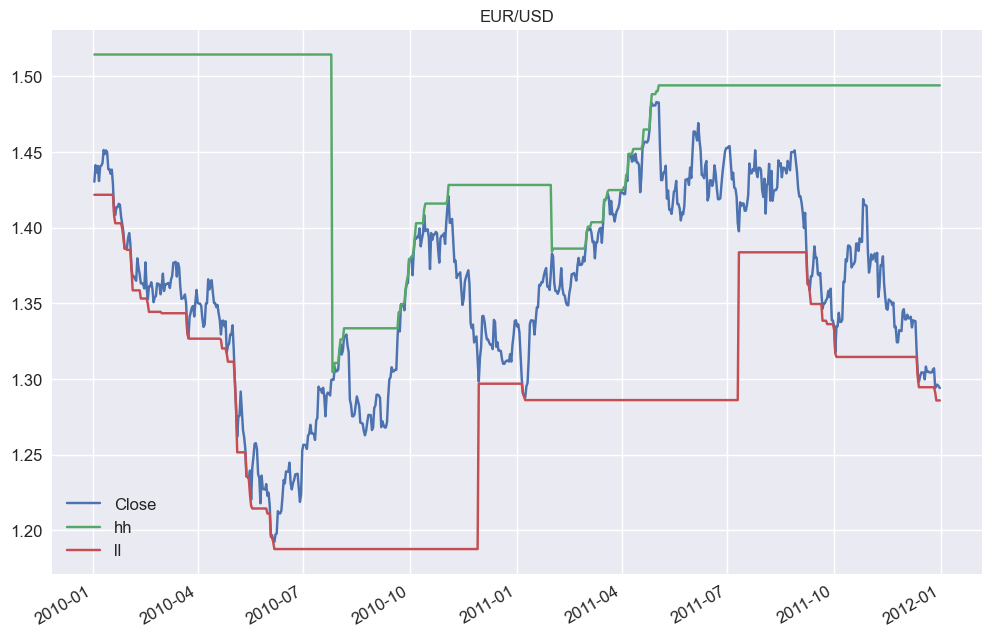

In [10]:
data.loc['2010':'2011', ['Close', 'hh', 'll']].plot(figsize = (12, 8), title = 'EUR/USD', fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

__Downtrend__: Most recent lower low is more recent than the most recent higher high <br>
__Uptrend__: Most recent higher high is more recent than the most recent lower low

In [11]:
data['Trend'] = np.where(data.hh_date > data.ll_date, 1, -1)

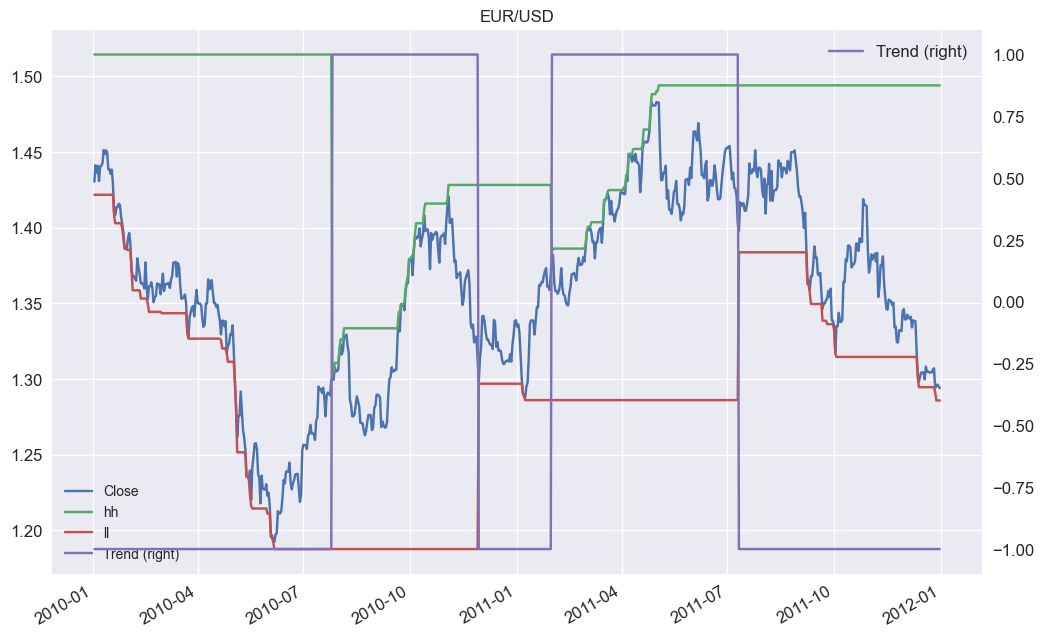

In [12]:
data.loc['2010':'2011', ['Close', 'hh', 'll', 'Trend']].plot(figsize = (12, 8), title = 'EUR/USD',
                                                             fontsize = 12, secondary_y = 'Trend')
plt.legend(fontsize = 12)
plt.show()

In [13]:
data['Trend'] = np.where(data.hh_date > data.ll_date, 'Up', 'Down')
data.drop(columns = ['hh_date', 'll_date'], inplace = True)

#### Fibonacci Retracement (23.6%) Breakout Strategy

__Add Fibonacci levels: 23.6%, 38.2%, (61.8%)__

In [14]:
data['R23.6'] = np.where(data.Trend == 'Up', data.hh - (data.hh-data.ll) * 0.236, data.hh - (data.hh-data.ll) * (1-0.236))

In [15]:
data['R38.2'] = np.where(data.Trend == 'Up', data.hh - (data.hh-data.ll) * 0.382, data.hh - (data.hh-data.ll) * (1-0.382))

> __Go Neutral when reaching new highs/lows (e.g. when trend reverses)__

In [16]:
data['position'] = np.where((data.hh != data.hh.shift()) | (data.ll != data.ll.shift()), 0, np.nan)

> **Downtrend**

__Go Long when Price breaks R23.6__: indicating temporary bullish trend

In [17]:
data['position'] = np.where((data.Trend == 'Down') & (data.Close.shift() < data['R23.6'].shift()) & (data.Close > data['R23.6']),
                            1, data.position)

__Go Neutral when Price reaches/breaks R38.2__: take profit

In [18]:
data['position'] = np.where((data.Trend == 'Down') & (data.Close.shift() < data['R38.2'].shift()) & (data.Close >= data['R38.2']),
                            0, data.position)

__Go Neutral when Prices reaches/breaks R0__: stop loss

In [19]:
data['position'] = np.where((data.Trend == 'Down') & (data.Close.shift() > data.ll.shift()) & (data.Close <= data.ll), 
                            0, data.position)

> **Uptrend**

__Go Short when Price breaks R23.6__: indicating temporary bearish trend

In [20]:
data['position'] = np.where((data.Trend == 'Up') & (data.Close.shift() > data['R23.6'].shift()) & (data.Close < data['R23.6']),
                            -1, data.position)

In [21]:
data.position.value_counts()

position
 0.0    542
 1.0     79
-1.0     76
Name: count, dtype: int64

__Go Neutral when Price reaches/breaks R38.2__: take profit

In [22]:
data['position'] = np.where((data.Trend == 'Up') & (data.Close.shift() > data['R38.2'].shift()) & (data.Close <= data['R38.2']),
                            0, data.position)

__Go Neutral when Prices reaches/breaks R0__: stop loss

In [23]:
data['position'] = np.where((data.Trend == 'Up') & (data.Close.shift() < data.hh.shift()) & (data.Close >= data.hh), 
                            0, data.position)

In [24]:
data['position'].ffill()

2008-01-01    0.0
2008-01-02    0.0
2008-01-03   -1.0
2008-01-05   -1.0
2008-01-06    0.0
             ... 
2020-12-23    0.0
2020-12-27    0.0
2020-12-28    0.0
2020-12-29    0.0
2020-12-30    0.0
Name: position, Length: 3811, dtype: float64

In [25]:
data['return'] = np.log(data.Close.div(data.Close.shift(1)))
data.dropna(inplace = True)

In [26]:
data['strategy'] = data.position.shift(1) * data['return']
data.dropna(inplace = True)

In [27]:
TRADING_COST = 0.00007

In [28]:
data['trades'] = data.position.diff().fillna(0).abs()

In [29]:
data['strategy_net'] = data.strategy - data.trades * TRADING_COST

In [30]:
data['return(cum)'] = data['return'].cumsum().apply(np.exp)
data['strategy(cum)'] = data['strategy'].cumsum().apply(np.exp)
data['strategy_net(cum)'] = data['strategy_net'].cumsum().apply(np.exp)

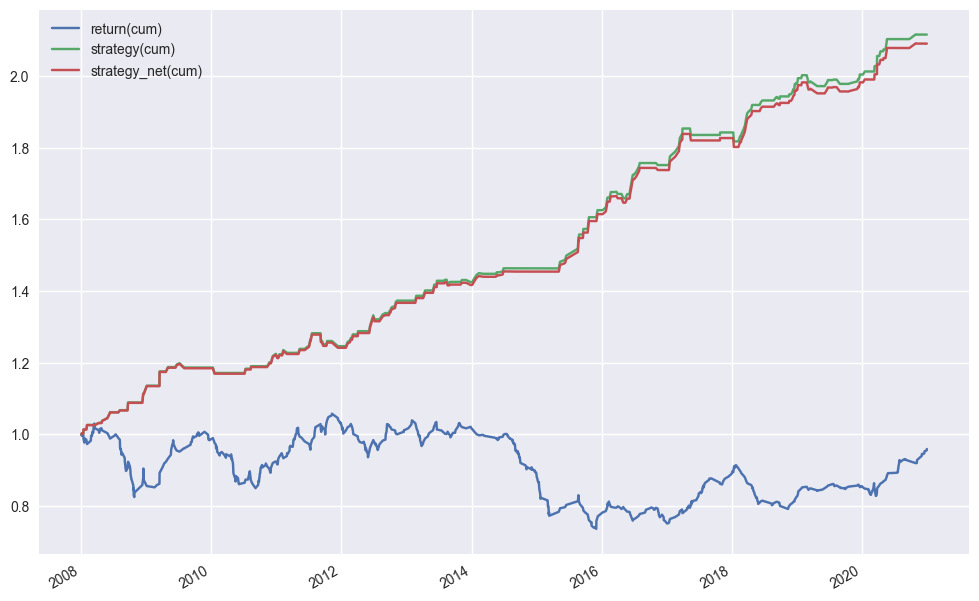

In [31]:
data[['return(cum)', 'strategy(cum)', 'strategy_net(cum)']].plot(figsize = (12 , 8))
plt.show()